# Introducción a las Redes Convolucionales

In [15]:
import keras
import os
os.environ["CUDA_VISIBLE_DEVICES"]="0" 


Vamos a comenzar mostrando una **Red Convolucional** muy simple para abordar el problema de clasificación MNIST que ya analizamos anteriormente. Con lo que hemos visto hasta ahora no resultará tan extraño, y más adelante detallaremos cada una de las capas que lo componen describiendo la funcionalidad que juegan en la red global. Veremos que, aunque la red convolucional que construiremos de forma directa es muy simple, supera el rendimiento de la red clásica que creamos en el primer notebook.

Si quieres leer una introducción (no matemática) de cómo y porqué funcionan las redes convolucionales puedes mirar [este magnífico blog de Ujjwal Karn](https://ujjwalkarn.me/2016/08/11/intuitive-explanation-convnets).

![](CNN.png)

## Construyendo una CNN

Como se puede observar en el siguiente código, esencialmente la red convolucional que vamos a usar está formada por dos capas convoluciones bidimensionales `layer_conv_2d` seguidas de dos capas max_pooling `layer_max_pooling_2d`.

In [3]:
from keras import layers
from keras import models
from keras.utils.vis_utils import plot_model

CNN = models.Sequential()
CNN.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
CNN.add(layers.MaxPooling2D((2, 2)))
CNN.add(layers.Conv2D(64, (3, 3), activation='relu'))
CNN.add(layers.MaxPooling2D((2, 2)))
CNN.add(layers.Conv2D(64, (3, 3), activation='relu'))
CNN.add(layers.MaxPooling2D((2, 2)))

plot_model(CNN, to_file='CNN_plot.png', show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [4]:
CNN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 1, 1, 64)         0

Una red convolucional toma como dato de entrada un tensor de la forma `(image_height, image_width, image_channels)`. En este caso, para ajustarse a las características de las imágenes de MNIST, será `(28, 28, 1)`, ya que usaremos un solo canal (gris) en las imágenes. Observa que el tamaño del dato de entrada se pasa como argumento de la primera capa con `input_shape = (28, 28, 1)`.

Cada capa de tipo `layer_conv_2d()` y `layer_max_pooling_2d()` dan como salida un tensor 3D de forma `(height, width, channels)`. Tanto la anchura como altura del tensor tienden a disminuir a medida que avanzamos en la red. El número de canales se controla por medio del primer argumento que se le pasa a las capas `layer_conv_2d()` (que en este caso es 32 o 64).

A continuación, hemos de pasar la salida de la última capa anterior (de tamaño `(3, 3, 64)`) a una red densa clasificadora similar a las que ya hemos visto en ejemplos anteriores. Como estas capas procesan vectores, que son 1D, y la entrada es un tensor 3D, hemos de aplanar el tensor por medio de la capa `layer_flatten()`, que también proporciona Keras:

In [5]:
CNN.add(layers.Flatten()) # 
CNN.add(layers.Dense(64, activation='relu'))
CNN.add(layers.Dense(10, activation='softmax'))

plot_model(CNN, to_file='CNN2_plot.png', show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


Como el objetivo es calcular una clasificación en 10 clases, la última capa es una capa densa con 10 unidades y con salida `softmax`. La red completa queda por tanto:

![](CNN2_plot.png)

In [6]:
CNN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 1, 1, 64)         0

Una vez definida la red, realizamos el entrenamiento de forma similar a como hicimos en el modelo simple de MNIST:


In [7]:
from keras.datasets import mnist
#from keras.utils import to_categorical
from keras.utils import np_utils

In [8]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data() # Carga de datos 

train_images = train_images.reshape((60000, 28, 28, 1)) # Reestructuración de datos, para que sean imágenes de 28x28 pixeles y 1 canal (escala de grises) 
train_images = train_images.astype('float32') / 255 # Normalización de datos, para que estén entre 0 y 1

test_images = test_images.reshape((10000, 28, 28, 1)) # Reestructuración de datos, para que sean imágenes de 28x28 pixeles y 1 canal (escala de grises) 
test_images = test_images.astype('float32') / 255 # Normalización de datos, para que estén entre 0 y 1

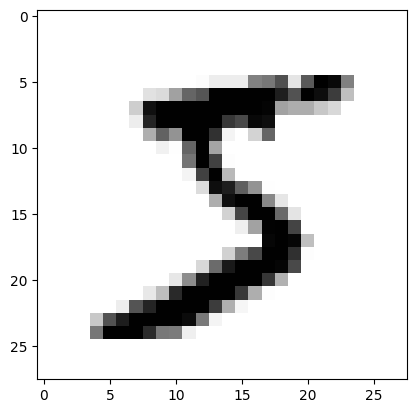

In [9]:
#visualzar elementos de la base de datos
import matplotlib.pyplot as plt # importar librería para visualizar
plt.imshow(train_images[0,:,:,0], cmap=plt.cm.binary) # visualizar un elemento de la base de datos 
plt.show()

In [10]:
nclases = 10
train_labels = np_utils.to_categorical(train_labels,nclases) #one hot encoding 
test_labels = np_utils.to_categorical(test_labels,nclases) #one hot encoding
#train_labels = to_categorical(train_labels)
#test_labels = to_categorical(test_labels)

In [11]:
CNN.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
CNN.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5


938/938 [==============================] - 12s 12ms/step - loss: 0.2761 - accuracy: 0.9134
Epoch 2/5
938/938 [==============================] - 11s 12ms/step - loss: 0.0846 - accuracy: 0.9743
Epoch 3/5
938/938 [==============================] - 10s 10ms/step - loss: 0.0575 - accuracy: 0.9820
Epoch 4/5
938/938 [==============================] - 10s 10ms/step - loss: 0.0437 - accuracy: 0.9865
Epoch 5/5
938/938 [==============================] - 10s 11ms/step - loss: 0.0354 - accuracy: 0.9892


Tras el entrenamiento podemos evaluar el modelo sobre los datos de test:


In [12]:
test_loss, test_acc = CNN.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.0489 - accuracy: 0.9849


In [13]:
test_acc

0.9848999977111816

Donde comprobamos que alcanzamos un accuracy de casi el 99%.

Enlace sugerido:
https://github.com/zalandoresearch/fashion-mnist